In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Get the Data

In [2]:
df = pd.read_csv('census.csv')
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
hours_per_week_bin    48842 non-null object
occupation_bin        48842 non-null object
msr_bin               48842 non-null object
capital_gl_bin        48842 non-null object
race_sex_bin          48842 non-null object
education_num_bin     48842 non-null object
education_bin         48842 non-null object
workclass_bin         48842 non-null object
age_bin               48842 non-null object
flag                  48842 non-null object
y                     48842 non-null int64
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [4]:
df.flag.value_counts()

train    32561
test     16281
Name: flag, dtype: int64

In [5]:
train = df[df['flag']=='train']
test = df[df['flag']=='test']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 11 columns):
hours_per_week_bin    32561 non-null object
occupation_bin        32561 non-null object
msr_bin               32561 non-null object
capital_gl_bin        32561 non-null object
race_sex_bin          32561 non-null object
education_num_bin     32561 non-null object
education_bin         32561 non-null object
workclass_bin         32561 non-null object
age_bin               32561 non-null object
flag                  32561 non-null object
y                     32561 non-null int64
dtypes: int64(1), object(10)
memory usage: 3.0+ MB


# Exploratory Data Analysis

In [6]:
train['age_bin'].value_counts()

e. 40-55             9354
a. 0-25              6411
c. 31-35 & 61-70     6145
d. 36-40 & 56-60     5950
b. 26-30 & 71-100    4701
Name: age_bin, dtype: int64

[]

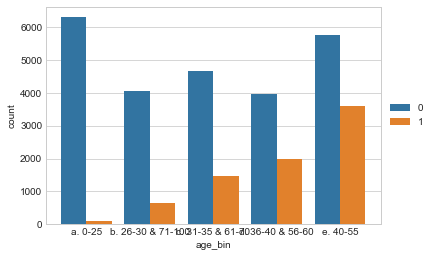

In [7]:
sns.countplot(x="age_bin", hue="y", data=train, 
              order = ['a. 0-25', 'b. 26-30 & 71-100', 'c. 31-35 & 61-70', 'd. 36-40 & 56-60', 'e. 40-55'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot()

In [8]:
train['capital_gl_bin'].value_counts()

a. = 0    28330
c. > 0     2712
b. < 0     1519
Name: capital_gl_bin, dtype: int64

[]

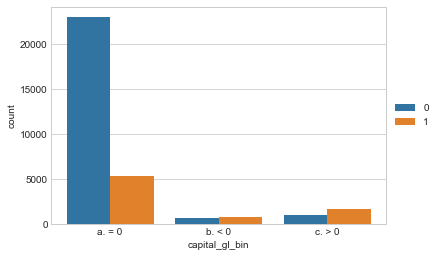

In [9]:
sns.countplot(x="capital_gl_bin", hue="y", data=train,
             order = ['a. = 0', 'b. < 0', 'c. > 0'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot()

In [10]:
train['education_bin'].value_counts()

b. Mid          20241
c. Bachelors     5355
a. Low           4253
d. Masters       1723
e. High           989
Name: education_bin, dtype: int64

[]

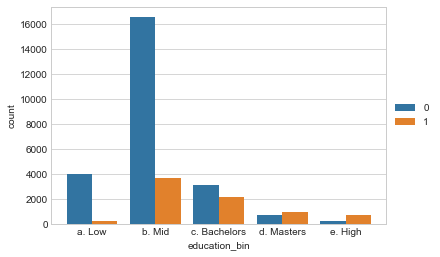

In [11]:
sns.countplot(x="education_bin", hue="y", data=train, 
             order = ['a. Low', 'b. Mid', 'c. Bachelors', 'd. Masters', 'e. High'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot()

[]

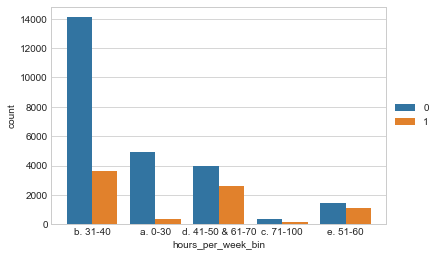

In [12]:
sns.countplot(x="hours_per_week_bin", hue="y", data=train)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot()

[]

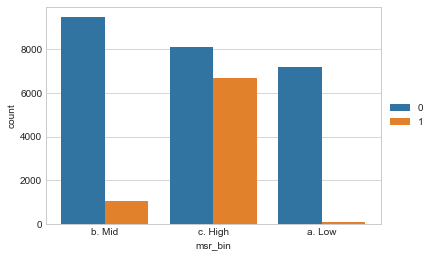

In [13]:
sns.countplot(x="msr_bin", hue="y", data=train)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot()

[]

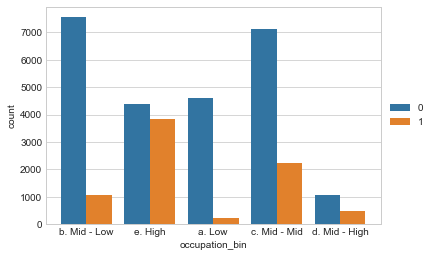

In [14]:
sns.countplot(x="occupation_bin", hue="y", data=train)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot()

[]

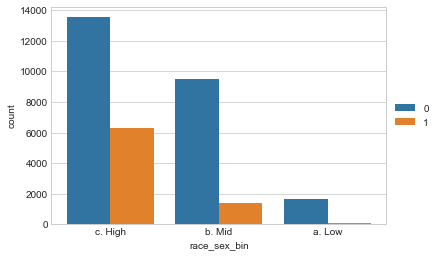

In [15]:
sns.countplot(x="race_sex_bin", hue="y", data=train)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot()

In [16]:
train.isna().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

y_train = train['y']
x_train = train[cat_feats]
x_train = pd.get_dummies(x_train, columns = cat_feats, drop_first = True)

y_test = test['y']
x_test = test[cat_feats]
x_test = pd.get_dummies(x_test, columns = cat_feats, drop_first=True)

In [19]:
def metrics(y_test, y_pred):
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression

In [20]:
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

C:\Users\Chaitanya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
metrics(y_test, y_pred)


Confusion Matrix:
[[11604   831]
 [ 1677  2169]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.56      0.63      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb =  GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)

In [24]:
metrics(y_test, y_pred)


Confusion Matrix:
[[10608  1827]
 [ 1412  2434]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     12435
           1       0.57      0.63      0.60      3846

   micro avg       0.80      0.80      0.80     16281
   macro avg       0.73      0.74      0.73     16281
weighted avg       0.81      0.80      0.80     16281

